In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_heatmap
)

pd.options.display.max_rows = 100

In [2]:
artifacts_fpath = '/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/clmbr/experiments/baseline/artifacts'

#### Setup table and figure parameters

In [3]:
y_axis = {
    'auc':{
        'lim':[-0.18, 0.18],
        'lim_raw':[0.65,1],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.25, 0.25],
        'lim_raw':[0,.75],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.06],
        'lim_raw':[0,0.08],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.2],
        'label':'BCE Loss'
    }
}

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

models = {
    'lr':'Logistic Regression',
    'gbm':'LightGBM'
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2009_2010_2011_2012':'09-12',
    '2010_2011_2012_2013':'10-13',
    '2011_2012_2013_2014':'11-14',
    '2012_2013_2014_2015':'12-15',
    '2013_2014_2015_2016':'13-16',
    '2014_2015_2016_2017':'14-17',
    '2015_2016_2017_2018':'15-18',
    '2016_2017_2018_2019':'16-19',
    '2017_2018_2019_2020':'17-20',
    '2018_2019_2020_2021':'18-21',
}

#### ID Performance

In [4]:
df = get_result_table(artifacts_fpath,train_years,tasks,metrics,models)
print("ID Performance of LR Models Trained on Various Year Groups")
display(df)

ID Performance of LR Models Trained on Various Year Groups


Train Group                                        09-12  \
Model                                Logistic Regression   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.897 (0.875, 0.916)   
                       AUPRC         0.23 (0.179, 0.286)   
                       Calibration    0.002 (0.0, 0.004)   
LOS > 7 Days           AUROC        0.825 (0.814, 0.836)   
                       AUPRC        0.549 (0.525, 0.576)   
                       Calibration  0.004 (0.001, 0.009)   
Readmission in 30 Days AUROC        0.789 (0.767, 0.812)   
                       AUPRC        0.273 (0.233, 0.314)   
                       Calibration  0.008 (0.004, 0.012)   
Admission to ICU       AUROC        0.871 (0.842, 0.897)   
                       AUPRC        0.219 (0.157, 0.283)   
                       Calibration  0.004 (0.001, 0.006)   

Train Group                                               \
Model                                           LightGBM   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.904 (0.883, 0.923)   
                       AUPRC        0.236 (0.183, 0.295)   
                       Calibration  0.005 (0.003, 0.008)   
LOS > 7 Days           AUROC        0.845 (0.835, 0.855)   
                       AUPRC        0.591 (0.567, 0.615)   
                       Calibration   0.01 (0.004, 0.015)   
Readmission in 30 Days AUROC        0.794 (0.773, 0.813)   
                       AUPRC         0.265 (0.23, 0.304)   
                       Calibration  0.008 (0.004, 0.013)   
Admission to ICU       AUROC        0.869 (0.837, 0.896)   
                       AUPRC        0.252 (0.187, 0.318)   
                       Calibration   0.007 (0.004, 0.01)   

Train Group                                        10-13  \
Model                                Logistic Regression   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.903 (0.883, 0.921)   
                       AUPRC         0.285 (0.23, 0.352)   
                       Calibration    0.002 (0.0, 0.004)   
LOS > 7 Days           AUROC        0.826 (0.817, 0.837)   
                       AUPRC        0.551 (0.523, 0.577)   
                       Calibration  0.004 (0.001, 0.009)   
Readmission in 30 Days AUROC        0.783 (0.759, 0.804)   
                       AUPRC          0.261 (0.221, 0.3)   
                       Calibration  0.007 (0.004, 0.011)   
Admission to ICU       AUROC        0.878 (0.855, 0.901)   
                       AUPRC         0.23 (0.179, 0.283)   
                       Calibration  0.004 (0.002, 0.007)   

Train Group                                               \
Model                                           LightGBM   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.905 (0.883, 0.923)   
                       AUPRC        0.283 (0.225, 0.349)   
                       Calibration  0.006 (0.004, 0.009)   
LOS > 7 Days           AUROC        0.845 (0.835, 0.855)   
                       AUPRC        0.594 (0.568, 0.619)   
                       Calibration   0.01 (0.004, 0.016)   
Readmission in 30 Days AUROC        0.789 (0.767, 0.811)   
                       AUPRC          0.27 (0.23, 0.314)   
                       Calibration  0.007 (0.003, 0.012)   
Admission to ICU       AUROC        0.881 (0.859, 0.902)   
                       AUPRC        0.275 (0.218, 0.339)   
                       Calibration  0.006 (0.003, 0.009)   

Train Group                                        11-14  \
Model                                Logistic Regression   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.913 (0.895, 0.931)   
                       AUPRC         0.267 (0.21, 0.331)   
                       Calibration    0.002 (0.0, 0.004)   
LOS > 7 Days           AUROC        

#### Heatmap

/local-scratch/nigam/envs/lguo/temp_ds_shift_robustness/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


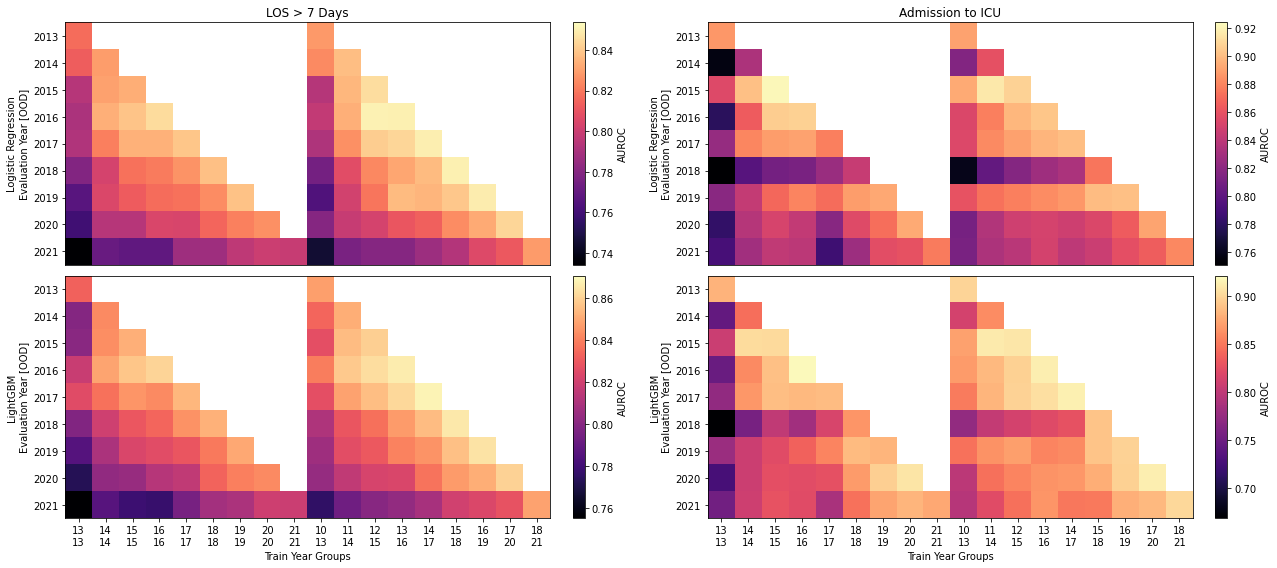

In [5]:
tasks = {
    'LOS_7':'LOS > 7 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2013':'13-13',
    '2014':'14-14',
    '2015':'15-15',
    '2016':'16-16',
    '2017':'17-17',
    '2018':'18-18',
    '2019':'19-19',
    '2020':'20-20',
    '2021':'21-21',
    '2010_2011_2012_2013':'10-13',
    '2011_2012_2013_2014':'11-14',
    '2012_2013_2014_2015':'12-15',
    '2013_2014_2015_2016':'13-16',
    '2014_2015_2016_2017':'14-17',
    '2015_2016_2017_2018':'15-18',
    '2016_2017_2018_2019':'16-19',
    '2017_2018_2019_2020':'17-20',
    '2018_2019_2020_2021':'18-21',
}

plot_heatmap(
    artifacts_fpath=artifacts_fpath,
    train_years=train_years,
    tasks=tasks,
    models=models,
    dv='comparator',
    y_axis='auto',
    test_group=['2013','2014','2015','2016','2017','2018','2019','2020','2021'],
    figsize=(18,8)
)